In [1]:
# Add related paths to system path
import sys
sys.path.append("../src")

import numpy as np
import pandas
import matplotlib.pyplot as plt
from models import FDBaseline, PDABaseline, CDABaseline, LinearUCB, LassoBandit
from evaluate import Evaluator

In [2]:
# Load data
data = pandas.read_csv("../data/data.csv", delimiter=',')
print(data.shape)

(5528, 87)


In [3]:
# Define baseline models
fixed = FDBaseline(1) # Define fixed dosage to be 1 (5mg / day)
pharm = PDABaseline()
clinic = CDABaseline()

In [4]:
# Get data for all baselines

# Fixed dosage baseline
fixed_features = fixed.get_features(data)

# Pharmacogenetic dosage baseline
pharm_features = pharm.get_features(data)

# Clinical dosage baseline
clinic_features = clinic.get_features(data)

# Get targets for each set (same targets for each baseline)
targets = fixed.get_targets(data)

In [5]:
# Define evaluators for each model
fixed_eval = Evaluator(fixed)
pharm_eval = Evaluator(pharm)
clinic_eval = Evaluator(clinic)

Fraction of correct decisions: 0.611794500723589


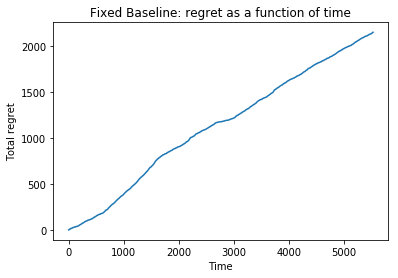

In [6]:
# Evaluate fixed baseline
fixed_predictions = fixed.predict(fixed_features)
fixed_acc = fixed_eval.accuracy(fixed_predictions, targets.values)
print("Fraction of correct decisions: " + str(fixed_acc))

fixed_regret = fixed_eval.regret(fixed_predictions, targets.values)
plt.plot(range(fixed_regret.shape[0]), fixed_regret)
plt.title("Fixed Baseline: regret as a function of time")
plt.xlabel("Time")
plt.ylabel("Total regret")
plt.show()

Fraction of correct decisions: 0.6864387593389178


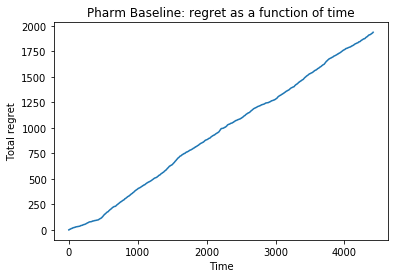

In [7]:
# Evaluate Pharmacogenetic baseline
pharm_predictions = pharm.predict(pharm_features.values[~np.isnan(pharm_features).any(axis=1)])
pharm_acc = pharm_eval.accuracy(pharm_predictions, targets.values[~np.isnan(pharm_features).any(axis=1)])
print("Fraction of correct decisions: " + str(pharm_acc))

pharm_regret = fixed_eval.regret(pharm_predictions, targets.values)
plt.plot(range(pharm_regret.shape[0]), pharm_regret)
plt.title("Pharm Baseline: regret as a function of time")
plt.xlabel("Time")
plt.ylabel("Total regret")
plt.show()

Fraction of correct decisions: 0.649083088068825


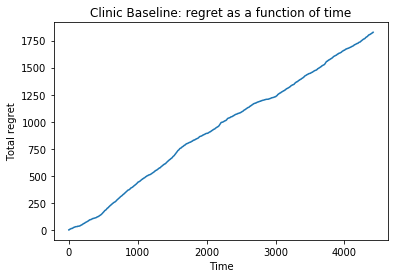

In [8]:
# Evaluate Clinical baseline
clinic_predictions = clinic.predict(clinic_features.values[~np.isnan(clinic_features).any(axis=1)])
clinic_acc = clinic_eval.accuracy(clinic_predictions, targets.values[~np.isnan(clinic_features).any(axis=1)])
print("Fraction of correct decisions: " + str(clinic_acc))

clinic_regret = fixed_eval.regret(clinic_predictions, targets.values)
plt.plot(range(clinic_regret.shape[0]), clinic_regret)
plt.title("Clinic Baseline: regret as a function of time")
plt.xlabel("Time")
plt.ylabel("Total regret")
plt.show()

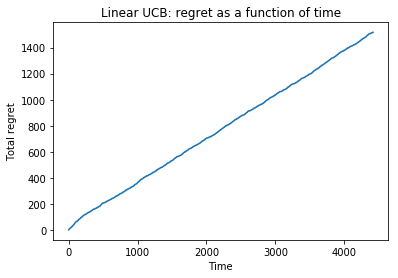

0.6564056133997284


In [9]:
linear_UCB = LinearUCB(num_arms=3, alpha=0.5)
linear_UCB_features = linear_UCB.get_features(data)
linear_UCB_regret, linear_UCB_incorrect = linear_UCB.train(linear_UCB_features.values[~np.isnan(linear_UCB_features).any(axis=1)], targets.values[~np.isnan(linear_UCB_features).any(axis=1)])
plt.plot(range(linear_UCB_regret.shape[0]), linear_UCB_regret)
plt.title("Linear UCB: regret as a function of time")
plt.xlabel("Time")
plt.ylabel("Total regret")
plt.show()

print(1 - linear_UCB_regret[len(linear_UCB_regret) -1] / len(linear_UCB_regret))

In [10]:
print(linear_UCB_incorrect)

[0.5732397554901517, 0.4247226624405705, 0.3921213493321259, 0.3586144441928911, 0.3506905139234775, 0.3398234095539959, 0.33869141951550824, 0.33710663346162556, 0.3355218474077428, 0.3339370613538601, 0.3321258772922798, 0.33348426533846504, 0.3275979171383292, 0.3305410912383971, 0.329635499207607, 0.3307674892460946, 0.3321258772922798, 0.33031469323069956, 0.33144668326918725, 0.3287299071768168, 0.3316730812768848, 0.33008829522300204, 0.33008829522300204, 0.33008829522300204, 0.3307674892460946, 0.3275979171383292, 0.3305410912383971, 0.32805071315372425, 0.3287299071768168, 0.32940910119990946, 0.33144668326918725, 0.33031469323069956, 0.3312202852614897, 0.33031469323069956, 0.3287299071768168, 0.329635499207607, 0.3278243151460267, 0.32578673307674894, 0.3278243151460267, 0.3282771111614218, 0.32805071315372425, 0.3251075390536563, 0.3251075390536563, 0.32601313108444646, 0.3282771111614218, 0.32805071315372425]


j_idxs: [   0    3    9   21   45   93  189  381  765 1533 3069 6141]
Indices for arm 1: [   0    3    9   21   45   93  189  381  765 1533 3069] 
j_idxs: [   1    4   10   22   46   94  190  382  766 1534 3070 6142]
Indices for arm 2: [   1    4   10   22   46   94  190  382  766 1534 3070] 
j_idxs: [   2    5   11   23   47   95  191  383  767 1535 3071 6143]
Indices for arm 3: [   2    5   11   23   47   95  191  383  767 1535 3071] 
Using forced arm 0 for sample 0
Using forced arm 1 for sample 1
Using forced arm 2 for sample 2
Using forced arm 0 for sample 3
Using forced arm 1 for sample 4
Using forced arm 2 for sample 5
Using forced arm 0 for sample 9
Using forced arm 1 for sample 10
Using forced arm 2 for sample 11
Using forced arm 0 for sample 21
Using forced arm 1 for sample 22
Using forced arm 2 for sample 23


/Users/mrlsdvd/Projects/Environments/.warfarin_dose_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/mrlsdvd/Projects/Environments/.warfarin_dose_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/mrlsdvd/Projects/Environments/.warfarin_dose_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/mrlsdvd/Projects/Environments/.wa

Using forced arm 0 for sample 45
Using forced arm 1 for sample 46
Using forced arm 2 for sample 47
Using forced arm 0 for sample 93
Using forced arm 1 for sample 94
Using forced arm 2 for sample 95
Using forced arm 0 for sample 189
Using forced arm 1 for sample 190
Using forced arm 2 for sample 191
Using forced arm 0 for sample 381
Using forced arm 1 for sample 382
Using forced arm 2 for sample 383
Using forced arm 0 for sample 765
Using forced arm 1 for sample 766
Using forced arm 2 for sample 767
Using forced arm 0 for sample 1533
Using forced arm 1 for sample 1534
Using forced arm 2 for sample 1535
Using forced arm 0 for sample 3069
Using forced arm 1 for sample 3070
Using forced arm 2 for sample 3071


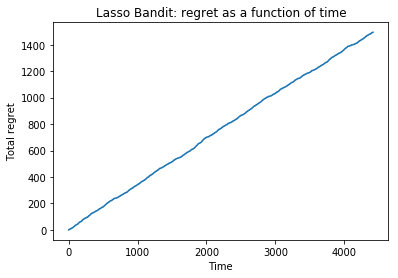

0.6618379357175193


In [5]:
lasso = LassoBandit(num_arms=3, lambda1=0.05, lambda2=0.05, h=5, q=1)
lasso_features = lasso.get_features(data)
lasso_regret, lasso_incorrect = lasso.train(lasso_features.values[~np.isnan(lasso_features).any(axis=1)], targets.values[~np.isnan(lasso_features).any(axis=1)])
# lasso_regret = lasso.train(lasso_features.values[~np.isnan(lasso_features).any(axis=1)], targets.values[~np.isnan(lasso_features).any(axis=1)])
plt.plot(range(lasso_regret.shape[0]), lasso_regret)
plt.title("Lasso Bandit: regret as a function of time")
plt.xlabel("Time")
plt.ylabel("Total regret")
plt.show()

print(1 - lasso_regret[len(lasso_regret) -1] / len(lasso_regret))